In [26]:
import seaborn as sns
import pandas as pd


In [31]:
df = pd.read_excel (r'C:\Users\saija\Downloads\supriya\Folds5x2_pp.xlsx')
print (df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [32]:
df.shape

(9568, 5)

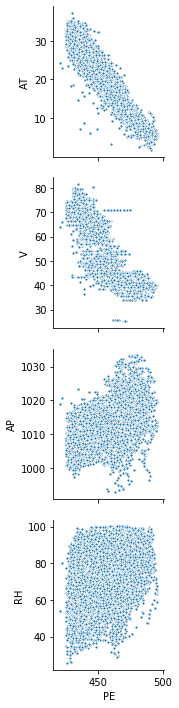

In [33]:
graph = sns.pairplot(df,x_vars=["PE"], y_vars=["AT", "V", "AP", "RH"],markers=".")

In [34]:
#mean
df.mean(axis=0)

AT      19.651231
V       54.305804
AP    1013.259078
RH      73.308978
PE     454.365009
dtype: float64

In [35]:
df.median(axis=0)

AT      20.345
V       52.080
AP    1012.940
RH      74.975
PE     451.550
dtype: float64

In [36]:
df.min(axis=0)

AT      1.81
V      25.36
AP    992.89
RH     25.56
PE    420.26
dtype: float64

In [37]:
df.max(axis=0)

AT      37.11
V       81.56
AP    1033.30
RH     100.16
PE     495.76
dtype: float64

In [38]:
#range
df.max() - df.min()

AT    35.30
V     56.20
AP    40.41
RH    74.60
PE    75.50
dtype: float64

In [39]:
#interQuartile
dataframe_AT=df['AT'].describe()
InterQuartile_AT = dataframe_AT[6] - dataframe_AT[4]
InterQuartile_AT

12.209999999999999

In [40]:
#C
import statsmodels.formula.api as smf
import statsmodels.tools.tools as add_contant
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('PE ~ AT' , data = df)
model = model.fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:59:07   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

In [41]:
#C

model.params

Intercept    497.03412
AT            -2.17132
dtype: float64

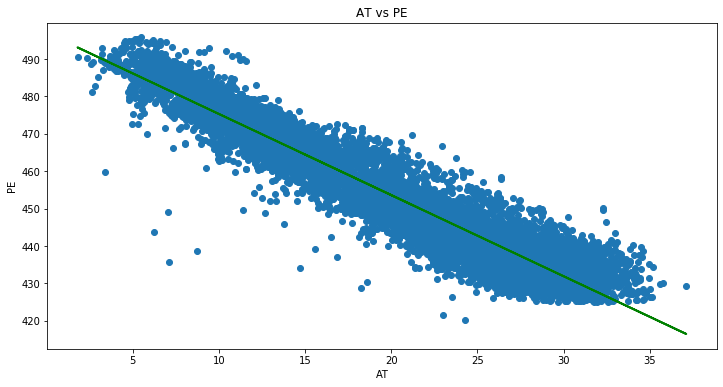

In [42]:
#C

from matplotlib import pyplot as plt

sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['AT'], df['PE'], 'o')           # scatter plot showing actual data
plt.plot(df['AT'], sales_pred, 'g', linewidth=2)   # regression line
plt.xlabel('AT')
plt.ylabel('PE')
plt.title('AT vs PE')
plt.show()

In [43]:
model_V = smf.ols('PE ~ V' , data = df)
model_V = model_V.fit()
print(model_V.summary())  

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:59:08   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

In [44]:
from sklearn.metrics import mean_squared_error ,r2_score
from math import sqrt
sales_pred_V = model_V.predict()
rms = sqrt(mean_squared_error(df['PE'],sales_pred_V))
rms

8.421083720649515

In [45]:
r2 = r2_score(df['PE'],sales_pred_V)
r2

0.7565177870683979

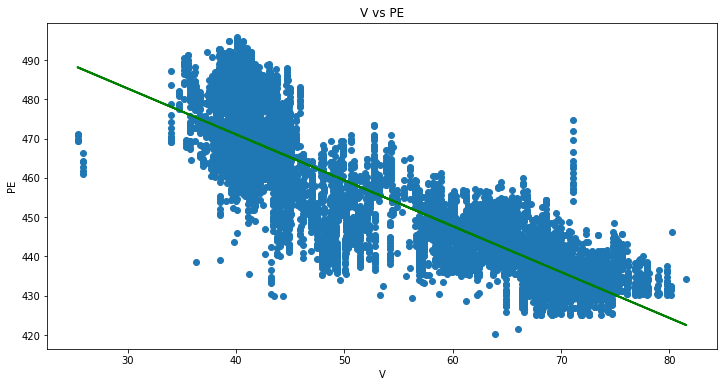

In [46]:

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['V'], df['PE'], 'o')           # scatter plot showing actual data
plt.plot(df['V'], sales_pred_V, 'g', linewidth=2)   # regression line
plt.xlabel('V')
plt.ylabel('PE')
plt.title('V vs PE')
plt.show()

In [47]:
model_AP = smf.ols('PE ~ AP' , data = df)
model_AP = model_AP.fit()
print(model_AP.summary())  

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:59:08   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

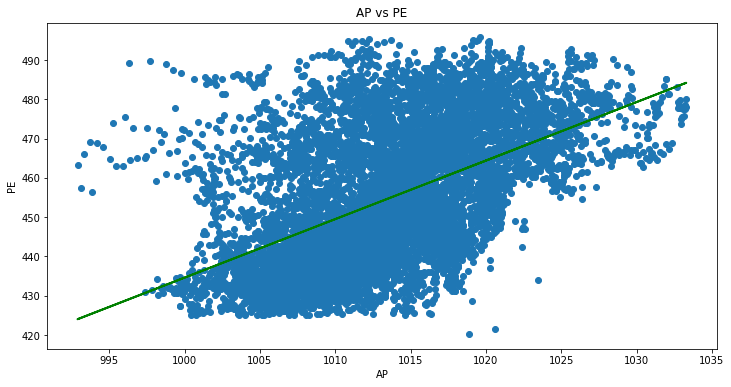

In [48]:
sales_pred_AP = model_AP.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['AP'], df['PE'], 'o')           # scatter plot showing actual data
plt.plot(df['AP'], sales_pred_AP, 'g', linewidth=2)   # regression line
plt.xlabel('AP')
plt.ylabel('PE')
plt.title('AP vs PE')
plt.show()

In [49]:
model_RH = smf.ols('PE ~ RH' , data = df)
model_RH = model_RH.fit()
print(model_RH.summary())  

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:59:09   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

In [50]:
model_RH = smf.ols('AT ~ V' , data = df)
model_RH = model_RH.fit()
print(model_RH.summary())  

                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:59:09   Log-Likelihood:                -26830.
No. Observations:                9568   AIC:                         5.366e+04
Df Residuals:                    9566   BIC:                         5.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2313      0.179    -40.330      0.0

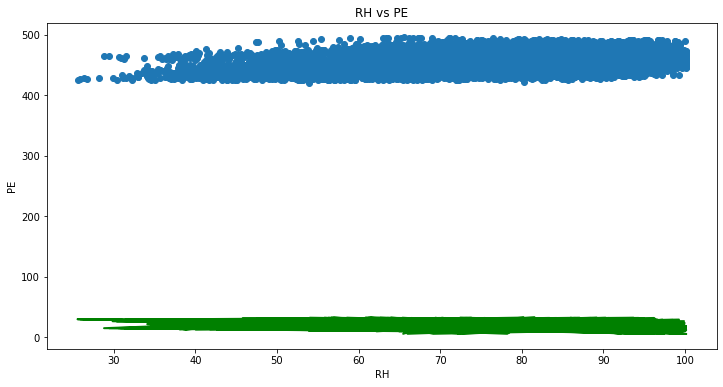

In [51]:
sales_pred_RH = model_RH.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['RH'], df['PE'], 'o')           # scatter plot showing actual data
plt.plot(df['RH'], sales_pred_RH, 'g', linewidth=2)   # regression line
plt.xlabel('RH')
plt.ylabel('PE')
plt.title('RH vs PE')
plt.show()

In [52]:
model = smf.ols('PE ~ AT + V + AP + RH ' , data = df)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:59:10   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

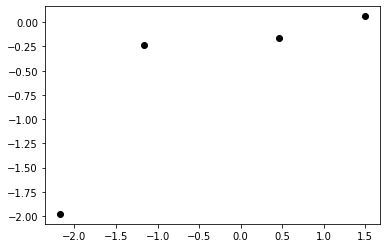

In [53]:
univarient_regression_points = [-2.1713,-1.1681,1.4899,0.4557]
multivarient_regression_points = [-1.9775,-0.2339,0.0621,-0.1581] 

plt.plot(univarient_regression_points, multivarient_regression_points, 'o', color='black')

In [ ]:
df1 = pd.DataFrame({'x':X, 'y':Y})

array([1.00000000e+00, 6.29600000e+01, 3.96396160e+03, 2.49571022e+05])

In [61]:
import statsmodels.tools.tools as smt

x= df['AT']
y = df ['PE']
x = df['AT'].values.reshape(-1,1)
y = df['PE'].values.reshape(-1,1) 
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
x = smt.add_constant(x)
model = smf.ols('PE~AT',data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:07:44   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [83]:
y = df['PE']
X = df.drop('PE',axis=1)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [85]:
type(y_train)

pandas.core.series.Series

In [86]:
X_1 = X_train

X_1['PE'] = y_train

model = smf.ols('PE ~ AT + V  + RH +AP' , data = X_1)
model = model.fit()
print(model.summary())

model_all = smf.ols('PE ~ AT + V +AP + RH + AT:V +AT:AP + AT:RH + V:AP +V:RH+  AP:RH + I(AT**3) + I(V**3)+ I(AP**3) + I(RH**3) ' , data = X_1)
model_all = model_all.fit()
print(model_all.summary())

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# test error
y_pred = model.predict(X_test)
model_rmse = mean_squared_error(y_test,y_pred)
print(model_rmse)

# train error
train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train,train_pred)
print(train_rmse)

# test error
y_pred_all = model_all.predict(X_test)
model_rmse_all = mean_squared_error(y_test,y_pred_all)
print(model_rmse_all)

# train error
train_pred_all = model_all.predict(X_train)
train_rmse_all = mean_squared_error(y_train,train_pred_all)
print(train_rmse_all)

In [100]:
#Normalized
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y=df['PE']
x=df.drop('PE',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
normalized_train = preprocessing.normalize(x_train)
normalized_test = preprocessing.normalize(x_test)
rmse_val = [] #to store rmse values for different k
for K in range(1,101,1):
   
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(normalized_train, y_train)  #fit the model
    pred=model.predict(normalized_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

#normal features


y=df['PE']
x=df.drop('PE',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

rmse_val = [] #to store rmse values for different k
for K in range(1,101,1):
   
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.328348996668952
RMSE value for k=  2 is: 4.719095997369929
RMSE value for k=  3 is: 4.485210615484845
RMSE value for k=  4 is: 4.367719764661627
RMSE value for k=  5 is: 4.317614718434741
RMSE value for k=  6 is: 4.318048873144199
RMSE value for k=  7 is: 4.315809910739278
RMSE value for k=  8 is: 4.312082851456957
RMSE value for k=  9 is: 4.288818204296003
RMSE value for k=  10 is: 4.27843819071794
RMSE value for k=  11 is: 4.263451355805462
RMSE value for k=  12 is: 4.26029005433804
RMSE value for k=  13 is: 4.273776102980262
RMSE value for k=  14 is: 4.282401056748291
RMSE value for k=  15 is: 4.283330981553346
RMSE value for k=  16 is: 4.281742106982771
RMSE value for k=  17 is: 4.28758676799797
RMSE value for k=  18 is: 4.286571870403655
RMSE value for k=  19 is: 4.304069149253852
RMSE value for k=  20 is: 4.308153284519813
RMSE value for k=  21 is: 4.308057510440805
RMSE value for k=  22 is: 4.318767782668053
RMSE value for k=  23 is: 4.325295967233918


RMSE value for k=  88 is: 4.61799861389362
RMSE value for k=  89 is: 4.62236790986399
RMSE value for k=  90 is: 4.627620978068907
RMSE value for k=  91 is: 4.631792654402307
RMSE value for k=  92 is: 4.637274980846477
RMSE value for k=  93 is: 4.643918320383922
RMSE value for k=  94 is: 4.650201887625044
RMSE value for k=  95 is: 4.657986355186
RMSE value for k=  96 is: 4.66120877970372
RMSE value for k=  97 is: 4.664710997125978
RMSE value for k=  98 is: 4.670560873059336
RMSE value for k=  99 is: 4.675595034063351
RMSE value for k=  100 is: 4.68011134790226


5.065998389406267
0.9118826627742724


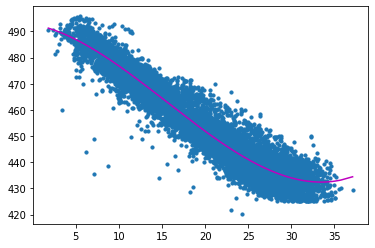

In [56]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = df['AT'].values.reshape(-1,1)
y = df['PE'].values.reshape(-1,1) 



polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


In [57]:
x_poly.shape

(9568, 4)

8.094768116235455
0.7750219775589422


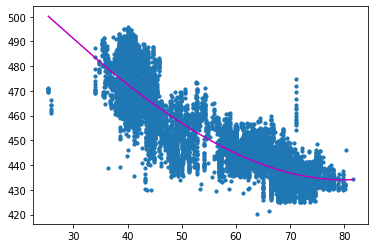

In [58]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = df['V'].values.reshape(-1,1)
y = df['PE'].values.reshape(-1,1) 



polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


15.699492769885767
0.15374253544345995


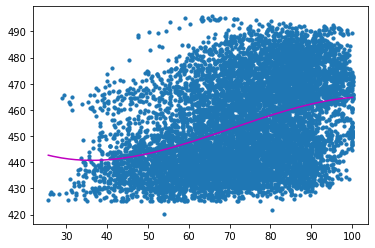

In [45]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = df['RH'].values.reshape(-1,1)
y = df['PE'].values.reshape(-1,1) 



polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


In [104]:
list_predict = ['AT','V', 'AP', 'RH']
for i in range(len(list_predict)) :
    x = list_predict[i]
    y = list_predict[i+1]
    #sns.regplot(x, y, data=df);
    model_RH = smf.ols('%s ~ %s' %(x,y),data=df).fit()
    print(model_RH.summary())

                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -26830.
No. Observations:                9568   AIC:                         5.366e+04
Df Residuals:                    9566   BIC:                         5.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2313      0.179    -40.330      0.0

IndexError: list index out of range

In [109]:
#g
list_predict = ['AT','V', 'AP', 'RH']

while len(list_predict) >1:

    for i in range(1,len(list_predict)):
        

        model_RH = smf.ols('%s ~ %s' %(list_predict[0],list_predict[i]),data=df).fit()

        print(list_predict[0],list_predict[i])

        print(model_RH.summary())

    list_predict.remove(list_predict[0])

 

AT V
                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:21:09   Log-Likelihood:                -26830.
No. Observations:                9568   AIC:                         5.366e+04
Df Residuals:                    9566   BIC:                         5.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2313      0.179    -40.330    

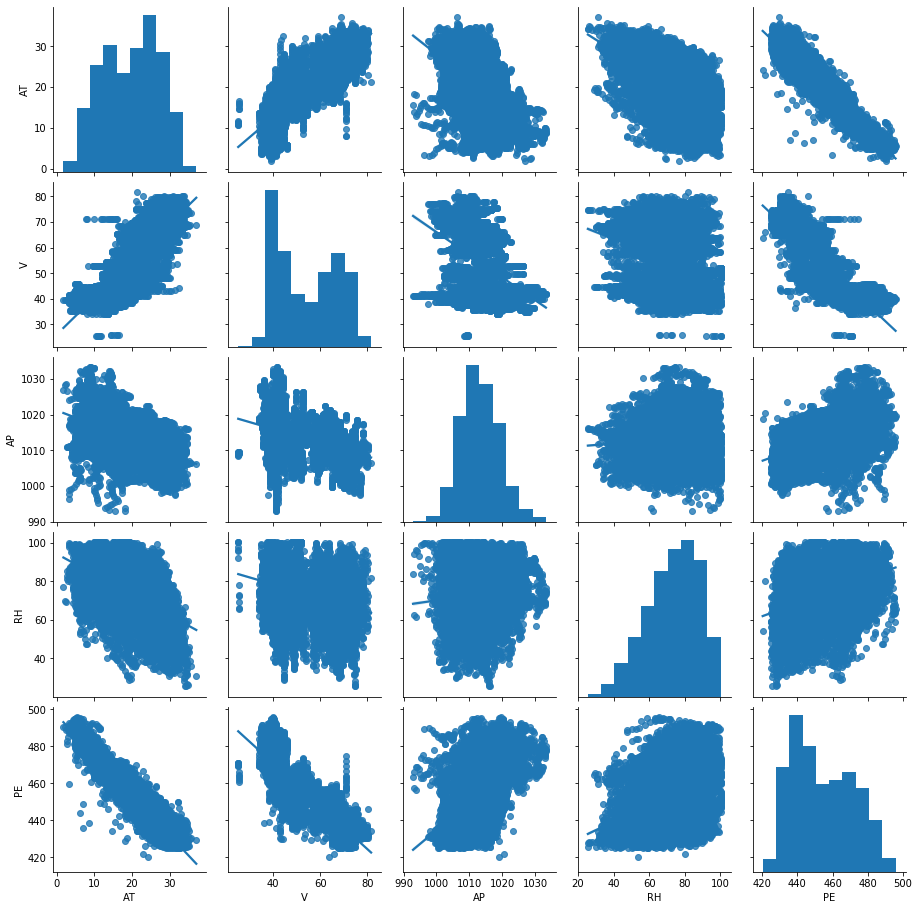

In [100]:
g = sns.pairplot(df, kind="reg",markers="o")

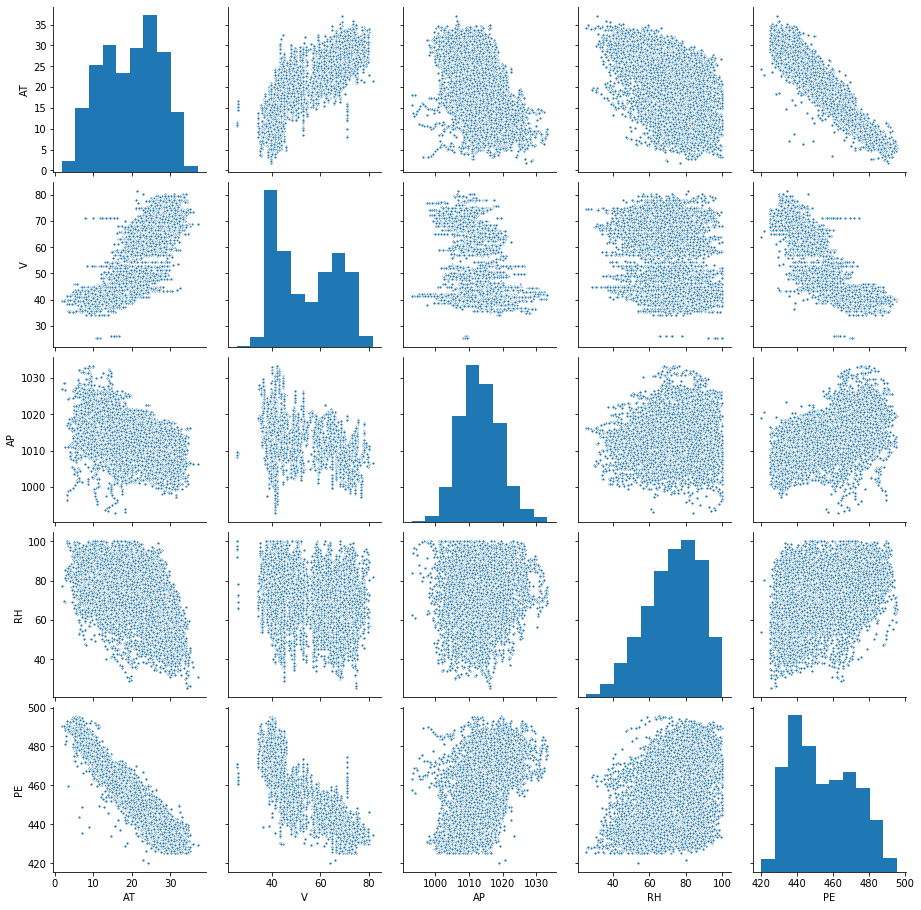

In [63]:
graph_all = sns.pairplot(df,x_vars=["AT", "V", "AP", "RH","PE"], y_vars=["AT", "V", "AP", "RH", "PE"],markers=".")

In [50]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
X = df['AT'].values.reshape(-1,1)
y = df['PE'].values.reshape(-1,1)


# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [51]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [497.03411989]
betas = [[-2.17131996]]


In [97]:
from sklearn.metrics import mean_squared_error ,r2_score
from math import sqrt
predictions = lm.predict(X)
rms = sqrt(mean_squared_error(df['PE'],predictions))
rms

5.4250992627871355

In [96]:
r2 = r2_score(df['PE'],predictions)
r2

0.8989475964148236

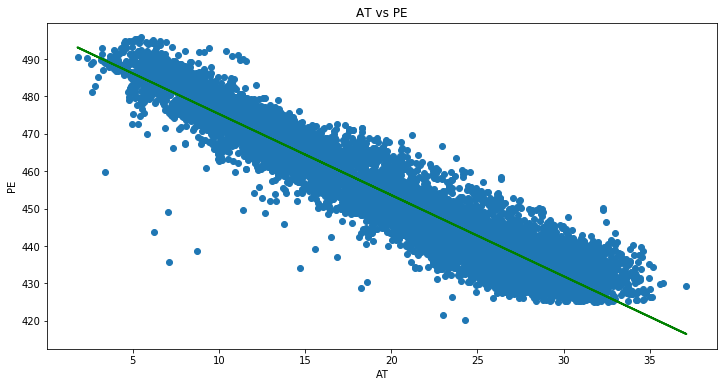

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['AT'], df['PE'], 'o')           # scatter plot showing actual data
plt.plot(df['AT'], predictions, 'g', linewidth=2)   # regression line
plt.xlabel('AT')
plt.ylabel('PE')
plt.title('AT vs PE')
plt.show()